In [2]:
import numpy as np
inputs = np.load("features.npy")
classes = np.load("classes.npy")

In [3]:
print(inputs.shape)
print(classes.shape)

(547, 45000)
(547,)


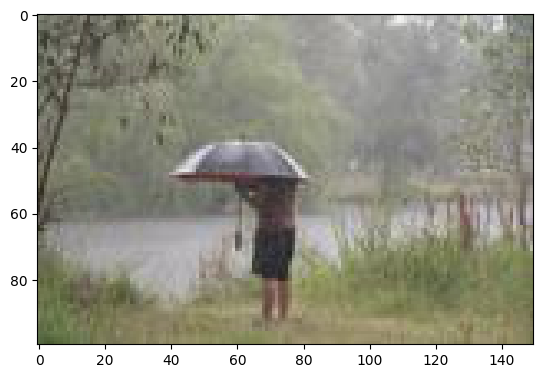

In [4]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(inputs[192,:], (100, 150, 3)))

Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(inputs, classes, test_size=0.2, random_state=42)
train_x.shape

(437, 45000)

Lets look at the classes in the dataset

In [6]:
print("There are the following classes in the training dataset:")
for idx, cls in enumerate(np.unique(classes)):
    clas_count = train_y[train_y == cls].shape[0]
    print(f"{cls}: {clas_count}")
print("There are the following classes in the testing dataset:")
for idx, cls in enumerate(np.unique(classes)):
    clas_count = test_y[test_y == cls].shape[0]
    print(f"{cls}: {clas_count}")

There are the following classes in the training dataset:
0: 232
1: 205
There are the following classes in the testing dataset:
0: 67
1: 43


## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(max_iter=1000)
LogisticRegressionModel.fit(train_x, train_y)
logistic_y_preds = LogisticRegressionModel.predict(test_x)

### Error Metrics

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, logistic_y_preds)
print(f"Accuracy: {accuracy}")

# Calculate the Precision
precision = precision_score(test_y, logistic_y_preds, average='weighted')
print(f"Precision: {precision}")

# Calculate the Recall
recall = recall_score(test_y, logistic_y_preds, average='weighted')
print(f"Recall: {recall}")

Accuracy: 0.8818181818181818
Precision: 0.896304557511454
Recall: 0.8818181818181818


## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RandomForestModel.fit(train_x, train_y)
random_forest_y_preds = RandomForestModel.predict(test_x)

In [10]:
# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, random_forest_y_preds)
print(f"Accuracy: {accuracy}")

# Calculate the Precision
precision = precision_score(test_y, random_forest_y_preds, average='weighted')
print(f"Precision: {precision}")

# Calculate the Recall
recall = recall_score(test_y, random_forest_y_preds, average='weighted')
print(f"Recall: {recall}")

Accuracy: 0.9
Precision: 0.9
Recall: 0.9


## Support Vector Machine

In [11]:
# Do support vector machine on train_x and train_y
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# model = SVC()
# kernel = ["linear", "rbf", "sigmoid", "poly"]
# tolerance = [1e-3, 1e-4, 1e-5, 1e-6]
# tolerance = loguniform(1e-6, 1e-3)
# C = [1, 1.5, 2, 2.5, 3]
# grid = dict(kernel=kernel, tol=tolerance, C=C)

# print("Grid search for the best hyperparameters")
# cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# randomSearch = RandomizedSearchCV(estimator=model, n_jobs=-1,
# 	cv=cvFold, param_distributions=grid,
# 	scoring="accuracy", n_iter=100, random_state=1)
# search_result = randomSearch.fit(train_x, train_y)

# print("Evalutating")
# bestModel = search_result.best_estimator_
# print(f"Best model scorer: {bestModel.score(test_x, test_y)}")

SVMModel = SVC(C=3.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0)
SVMModel.fit(train_x, train_y)
svm_y_preds = SVMModel.predict(test_x)


In [12]:
# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, svm_y_preds)
print(f"Accuracy: {accuracy}")

# Calculate the Precision
precision = precision_score(test_y, svm_y_preds, average='weighted')
print(f"Precision: {precision}")

# Calculate the Recall
recall = recall_score(test_y, svm_y_preds, average='weighted')
print(f"Recall: {recall}")

Accuracy: 0.9818181818181818
Precision: 0.9823451910408432
Recall: 0.9818181818181818


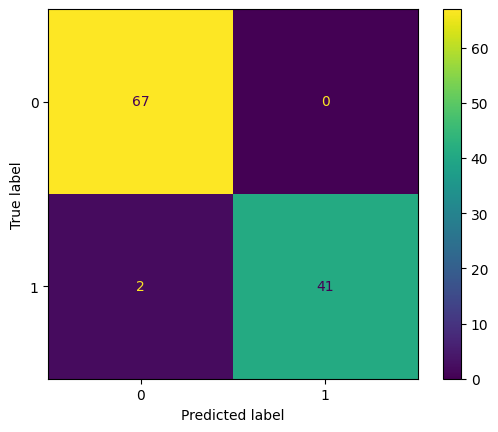

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, svm_y_preds, labels=SVMModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVMModel.classes_)
disp.plot() 

In [ ]:
# Do KNN on train_x and train_y
from sklearn.neighbors import KNeighborsClassifier
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(train_x, train_y)
knn_y_preds = KNNModel.predict(test_x)

## KNN Classifier

In [ ]:
# Do KNN on train_x and train_y
from sklearn.neighbors import KNeighborsClassifier
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(train_x, train_y)
knn_y_preds = KNNModel.predict(test_x)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, knn_y_preds)
print(f"Accuracy: {accuracy}")

# Calculate the Precision
precision = precision_score(test_y, knn_y_preds, average='weighted')
print(f"Precision: {precision}")

# Calculate the Recall
recall = recall_score(test_y, knn_y_preds, average='weighted')
print(f"Recall: {recall}")

Accuracy: 0.9272727272727272
Precision: 0.9310289118508297
Recall: 0.9272727272727272
